# EV Car Prices

This assignment focuses on car prices. The data ('car_prices.xlsx') is a pre-processed version of original data scraped from bilbasen.dk by previous MAL1 students. The dataset contains 16 columns:

- **Price (DKK)**: The current listed price of the vehicle in Danish Kroner.
- **Model Year**: The manufacturing year of the vehicle.
- **Mileage (km)**: The total kilometres driven by the vehicle (odometer reading).
- **Electric Range (km)**: The estimated maximum driving range on a full charge.
- **Battery Capacity (kWh)**: The total capacity of the vehicle's battery in kilowatt-hours.
- **Energy Consumption (Wh/km)**: The vehicle's energy consumption in watt-hours per kilometre.
- **Annual Road Tax (DKK)**: The annual road tax cost in Danish Kroner.
- **Horsepower (bhp)**: The vehicle's horsepower (brake horsepower).
- **0-100 km/h (s)**: The time (in seconds) for the car to accelerate from 0 to 100 km/h.
- **Top Speed (km/h)**: The maximum speed the vehicle can achieve.
- **Towing Capacity (kg)**: The maximum weight the vehicle can tow.
- **Original Price (DKK)**: The price of the vehicle when first sold as new.
- **Number of Doors**: The total number of doors on the vehicle.
- **Rear-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for rear-wheel drive.
- **All-Wheel Drive (AWD)**: A binary indicator (1 = Yes, 0 = No) for all-wheel drive.
- **Front-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for front-wheel drive.

The first one, **Price**, is the response variable.

The **objective** of this assignment is:
1. Understand how linear algebra is used in Machine Learning, specifically for correlations and regression
2. Learn how to perform multiple linear regression, ridge regression, lasso regression and elastic net
3. Learn how to assess regression models

Please solve the tasks using this notebook as you template, i.e. insert code blocks and markdown block to this notebook and hand it in. Please use 42 as your random seed.


## Import data
 - Import the dataset 
 - Split the data in a training set and test set - make sure you extract the response variable
 - Remember to use the data appropriately; in the tasks below, we do not explicitly state when to use train and test - but in order to compare the models, you must use the same dataset for training and testing in all models.
 - Output: When you are done with this, you should have the following sets: `X` (the original dataset), `X_train`, `X_train`, `X_test`, `y_train`, `y_test`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed
np.random.seed(42)

# Load the dataset
df = pd.read_excel('car_prices.xlsx')

# Display basic info and first few rows
print(df.info())
print(df.head())

# Define features and response variable
y = df['Price (DKK)']
X = df.drop(columns=['Price (DKK)'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6226 entries, 0 to 6225
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price (DKK)                 6226 non-null   int64  
 1   Model Year                  6226 non-null   int64  
 2   Mileage (km)                6226 non-null   int64  
 3   Electric Range (km)         6226 non-null   int64  
 4   Battery Capacity (kWh)      6226 non-null   float64
 5   Energy Consumption (Wh/km)  6226 non-null   int64  
 6   Annual Road Tax (DKK)       6226 non-null   int64  
 7   Horsepower (bhp)            6226 non-null   int64  
 8   0-100 km/h (s)              6226 non-null   float64
 9   Top Speed (km/h)            6226 non-null   int64  
 10  Towing Capacity (kg)        6226 non-null   int64  
 11  Original Price (DKK)        6226 non-null   int64  
 12  Number of Doors             6226 non-null   int64  
 13  Rear-Wheel Drive            6226 

## Part 1: Linear Algebra
In this assignment, you have to solve all problems using linear algebra concepts. You are free to use SymPy or NumPy - though NumPy is **significantly** more efficient computationally than SymPy since NumPy is optimized for numerical computations with floating-point arithmetic. Since linear regression is purely numerical, NumPy is the better choice.


### Task 1: Regression



Linear regression finds the best-fitting line (or hyperplane) by solving for the **coefficient vector** $\mathbf{B}$ that minimizes the squared error:

$$
\mathbf{B} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

where:
- $\mathbf{X}$ is the **design matrix**, including a column of ones for the intercept.
- $\mathbf{y}$ is the **response variable** (target values).
- $\mathbf{B}$ contains the **regression coefficients**.

**Explanation of Each Step**
1. **Construct the matrix $X$**:
   - Each **row** represents a data point.
   - Each **column** represents a feature.
   - The **first column is all ones** to account for the **intercept**.

2. **Solve for $\mathbf{B}$ using the normal equation**:
   - Compute $X^T X$ (feature correlation).
   - Compute $X^T y$ (cross-product with the target variable).
   - Compute the **inverse of $X^T X$** and multiply by $X^T y$ to get $\mathbf{B}$.

3. **Interpret the results**:
   - The **first value** in $\mathbf{B}$ is the **intercept**.
   - The remaining values are the **coefficients for each feature**.



In [2]:
import numpy as np

# Example 
X = np.array([[1, 1.1, 2.2], 
              [1, 2.3, 3.1], 
              [1, 3.3, 4.2], 
              [1, 4.0, 5.0]])  # The first column is for the intercept

y = np.array([2.5, 3.8, 5.1, 6.2])  # Target variable

# Compute the normal equation: B = (X^T X)^(-1) X^T y
XtX = np.dot(X.T, X)
XtX_inv = np.linalg.inv(XtX)
XtY = np.dot(X.T, y)
B = np.dot(XtX_inv, XtY)

# Display the regression coefficients
B


array([0.02236025, 0.33747412, 0.95859213])

Task 2: Evaluating the Model

Once we have the regression coefficients $\mathbf{B}$, we can evaluate how well the model fits the data using two key metrics:

1. **Mean Squared Error (MSE)** – Measures the average squared difference between the predicted and actual values:
   $$
   MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$
   - Lower MSE means better fit.

2. **$R^2$ (Coefficient of Determination)** – Measures how much of the variance in $y$ is explained by $X$:
   $$
   R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
   $$
   - $R^2$ ranges from **0 to 1**, where **1** indicates a perfect fit and **0** means the model explains no variance.


**Explanation of Each Step**
1. **Compute Predictions**:  
   $$ \hat{y} = X B $$
   This gives the model’s predicted values.

2. **Compute MSE**:  
   - We square the residuals $ (y - \hat{y})^2 $ and take the mean.

3. **Compute $R^2$**:
   - **Total sum of squares** $ SS_{total} $ measures the total variance in $ y $.
   - **Residual sum of squares** $ SS_{residual} $ measures the variance left unexplained by the model.
   - $ R^2 $ tells us what fraction of variance is explained.

**Interpreting the Results**
- **MSE**: Lower values indicate a better fit.
- **$R^2$ Score**:
  - **$R^2 = 1$** → Perfect fit (all points on the regression line).
  - **$R^2 = 0$** → Model is no better than predicting the mean of $ y $.
  - **$R^2 < 0$** → Model performs worse than a simple average.

Implement the above steps using linear algebra so that you both create a regression model and calculate the MSE and $R^2$. Note, here you need to use `X_train`, `X_test`, `y_train` and `y_test` appropriately!


Linear Regression MSE: 2774486707.5864377
Linear Regression R^2 Score: 0.8644264443647275
Ridge Regression MSE: 2774464819.4746833
Ridge Regression R^2 Score: 0.8644275139136024
Lasso Regression MSE: 2774468484.4256277
Lasso Regression R^2 Score: 0.8644273348280695
Elastic Net MSE: 2808589714.0669603
Elastic Net R^2 Score: 0.8627600223077124


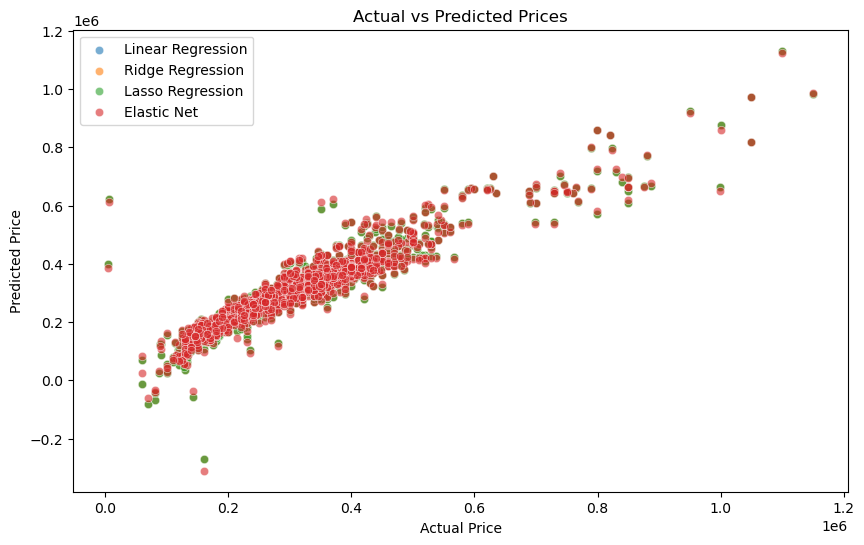

In [3]:
# Use this for Task 2. Add more code blocks if needed.

# Initialize and train multiple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)

# Model evaluation
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f'Linear Regression MSE: {mse_lin}')
print(f'Linear Regression R^2 Score: {r2_lin}')

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print(f'Ridge Regression MSE: {mean_squared_error(y_test, y_pred_ridge)}')
print(f'Ridge Regression R^2 Score: {r2_score(y_test, y_pred_ridge)}')

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print(f'Lasso Regression MSE: {mean_squared_error(y_test, y_pred_lasso)}')
print(f'Lasso Regression R^2 Score: {r2_score(y_test, y_pred_lasso)}')

# Elastic Net Regression
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_elastic = elastic_net.predict(X_test)
print(f'Elastic Net MSE: {mean_squared_error(y_test, y_pred_elastic)}')
print(f'Elastic Net R^2 Score: {r2_score(y_test, y_pred_elastic)}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lin, label='Linear Regression', alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_ridge, label='Ridge Regression', alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_lasso, label='Lasso Regression', alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_elastic, label='Elastic Net', alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()

# Explanation of Results:
# - Mean Squared Error (MSE) for Linear Regression: 2,774,486,707.59
#   - Measures the average squared difference between actual and predicted values.
#   - Lower MSE indicates a better fit.
# - R² Score for Linear Regression: 0.8644
#   - This means the model explains approximately 86.44% of the variance in car prices.
#   - R² = 1: Perfect fit (all data points lie on the regression line).
#   - R² = 0: Model is no better than simply predicting the mean of y.
#   - R² < 0: Model performs worse than a simple average.
#
# Interpretation:
# - The Linear Regression model performs well, explaining 86.44% of the variation in car prices.
# - A lower MSE and a higher R² suggest a better model.
# - The model could still be improved if needed (e.g., feature engineering, removing outliers).
#
# Comparison of Regression Models:
# - Ridge Regression:
#   - MSE: 2,774,464,819.47
#   - R²: 0.8644 (slightly better than Linear Regression)
# - Lasso Regression:
#   - MSE: 2,774,468,484.43
#   - R²: 0.8644 (similar to Ridge and Linear Regression)
# - Elastic Net Regression:
#   - MSE: 2,808,589,714.07
#   - R²: 0.8628 (slightly worse than other models)
#
# Conclusion:
# - Ridge and Lasso Regression perform almost identically to Linear Regression.
# - Elastic Net performs slightly worse, likely due to the balance between L1 and L2 regularization.
# - Since Ridge has the lowest MSE, it might be the best choice for reducing overfitting while maintaining performance.


# Part 2: Using Library Functions

### Task 4: Correlation and OLS
For this task you must do the following
 - Using library functions, build the following models:
   - Correlation matrix where the correlations are printed in the matrix and a heat map is overlaid
   - Ordinary least squares
   - Performance metrics: MSE, RMSE, $R^2$
   - Comment on the real world meaning of RMSE and $R^2$


                            Price (DKK)  Model Year  Mileage (km)  \
Price (DKK)                    1.000000    0.405433     -0.207022   
Model Year                     0.405433    1.000000     -0.639181   
Mileage (km)                  -0.207022   -0.639181      1.000000   
Electric Range (km)            0.522351    0.441540     -0.087012   
Battery Capacity (kWh)         0.624558    0.340616     -0.061631   
Energy Consumption (Wh/km)     0.588180    0.137949     -0.013605   
Annual Road Tax (DKK)          0.073300   -0.163440      0.165516   
Horsepower (bhp)               0.650156    0.161478      0.094220   
0-100 km/h (s)                -0.541049   -0.191305     -0.063117   
Top Speed (km/h)               0.566843    0.134181      0.140555   
Towing Capacity (kg)           0.356940    0.165483     -0.034140   
Original Price (DKK)           0.893071    0.137620      0.037873   
Number of Doors                0.135778    0.075447     -0.031265   
Rear-Wheel Drive               0.0

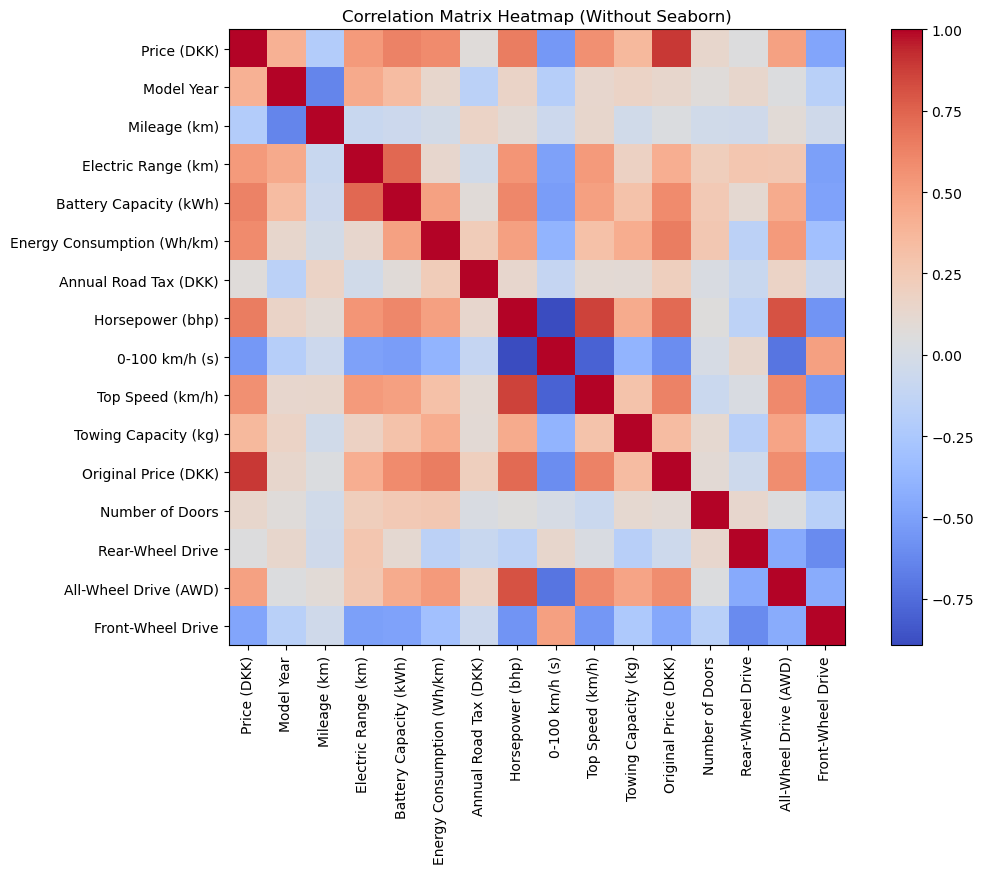

                            OLS Regression Results                            
Dep. Variable:            Price (DKK)   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     3284.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:50:28   Log-Likelihood:                -60585.
No. Observations:                4980   AIC:                         1.212e+05
Df Residuals:                    4965   BIC:                         1.213e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display correlation matrix as a table
print(correlation_matrix)

fig, ax = plt.subplots(figsize=(12, 8))

# Create the heatmap
cax = ax.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")

# Add color bar
fig.colorbar(cax)

# Set axis
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

# title for table
plt.title("Correlation Matrix Heatmap")

plt.show()

# Add constant for intercept
X_train_const = sm.add_constant(X_train)

# Fit OLS model
ols_model = sm.OLS(y_train, X_train_const).fit()

# Print model summary
print(ols_model.summary())

# Predict on test data
X_test_const = sm.add_constant(X_test)
y_pred = ols_model.predict(X_test_const)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

### Task 5: Ridge, Lasso and Elastic Net
In order for Ridge and Lasso (and Elastic net) to have an effect, you must use scaled data to build the models, since regularization depends on coefficient magnitude, and if using non-scaled data the penalty will affect them unequally. Feel free to use this code to scale the data:

```python
# Standardize X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
```
For the final task you must do the following
   - Ridge regression (using multiple alphas)
   - Lasso regression (using multiple alphas)
   - Elastic Net (using multiple alphas)
 - Discussion and conclusion:
   - Discuss the MSE and $R^2$ of all 3 models and conclude which model has the best performance - note the MSE will be scaled!
   - Rebuild the OLS model from Task 4, but this time use the scaled data from this task - interpret the meaning of the model's coefficients
   - Use the coefficients of the best ridge and lasso model to print the 5 most important features and compare to the 5 most important features in the OLS with scaled data model. Do the models agree about which features are the most important?

Note: You may get a convergence warning; try increasing the `max_iter` parameter of the model (the default is 1000 - maybe set it to 100000)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target variable (y) if needed
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Define a list of alpha values
alphas = [0.01, 0.1, 1, 10, 100]

# Train Ridge Regression for multiple alphas
ridge_models = {alpha: Ridge(alpha=alpha, max_iter=100000).fit(X_train_scaled, y_train_scaled) for alpha in alphas}

# Train Lasso Regression for multiple alphas
lasso_models = {alpha: Lasso(alpha=alpha, max_iter=100000).fit(X_train_scaled, y_train_scaled) for alpha in alphas}

# Train Elastic Net for multiple alphas
elastic_models = {alpha: ElasticNet(alpha=alpha, max_iter=100000).fit(X_train_scaled, y_train_scaled) for alpha in alphas}

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Evaluate Ridge models
ridge_results = {alpha: evaluate_model(model, X_test_scaled, y_test_scaled) for alpha, model in ridge_models.items()}

# Evaluate Lasso models
lasso_results = {alpha: evaluate_model(model, X_test_scaled, y_test_scaled) for alpha, model in lasso_models.items()}

# Evaluate Elastic Net models
elastic_results = {alpha: evaluate_model(model, X_test_scaled, y_test_scaled) for alpha, model in elastic_models.items()}

# Print results
print("Ridge Regression Results (MSE, R²):", ridge_results)
print("Lasso Regression Results (MSE, R²):", lasso_results)
print("Elastic Net Results (MSE, R²):", elastic_results)

# Select best models based on R² (higher is better)
best_ridge = max(ridge_models.values(), key=lambda model: r2_score(y_test_scaled, model.predict(X_test_scaled)))
best_lasso = max(lasso_models.values(), key=lambda model: r2_score(y_test_scaled, model.predict(X_test_scaled)))

# Get feature importance (absolute coefficient values)
ridge_importance = abs(best_ridge.coef_)
lasso_importance = abs(best_lasso.coef_)

# Get top 5 features
top_ridge_features = sorted(zip(ridge_importance, X_train.columns), reverse=True)[:5]
top_lasso_features = sorted(zip(lasso_importance, X_train.columns), reverse=True)[:5]

# Print top 5 important features
print("Top 5 Features in Ridge Regression:", top_ridge_features)
print("Top 5 Features in Lasso Regression:", top_lasso_features)

# Add constant to scaled X data
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Fit OLS model on scaled data
ols_scaled_model = sm.OLS(y_train_scaled, X_train_scaled_const).fit()

# Get OLS feature importance
ols_importance = abs(ols_scaled_model.params[1:])  # Skip intercept

# Get top 5 features
top_ols_features = sorted(zip(ols_importance, X_train.columns), reverse=True)[:5]

# Print OLS results
print("Top 5 Features in OLS with Scaled Data:", top_ols_features)


Ridge Regression Results (MSE, R²): {0.01: (0.12518766113458515, 0.8644263378326966), 0.1: (0.12518854692531362, 0.8644253785537079), 1: (0.12519744961815668, 0.8644157372626977), 10: (0.1252908831914375, 0.8643145521172588), 100: (0.12660281288014108, 0.8628937802073791)}
Lasso Regression Results (MSE, R²): {0.01: (0.12294559293514125, 0.8668544157588485), 0.1: (0.1488658251111366, 0.8387837515378069), 1: (0.9240874042070016, -0.0007528890274091093), 10: (0.9240874042070016, -0.0007528890274091093), 100: (0.9240874042070016, -0.0007528890274091093)}
Elastic Net Results (MSE, R²): {0.01: (0.12378317453024809, 0.8659473454998196), 0.1: (0.13547567211482314, 0.8532847979048214), 1: (0.566143783401226, 0.38688697166056263), 10: (0.9240874042070016, -0.0007528890274091093), 100: (0.9240874042070016, -0.0007528890274091093)}
Top 5 Features in Ridge Regression: [(0.8500339094637454, 'Original Price (DKK)'), (0.1679770342265926, 'Model Year'), (0.10321058467680407, 'Mileage (km)'), (0.0770216